In [6]:
from osgeo import gdal
import numpy as np

In [4]:
receptor_filename = r"H:\Projects\C1308_SEAT\SEAT_inputs\plugin-input\oregon\receptor\grainsize_receptor.tif"

In [7]:
data = gdal.Open(receptor_filename)
img = data.GetRasterBand(1)
receptor_array = img.ReadAsArray()
# transpose to be in same orientation as NetCDF
receptor_array = np.transpose(receptor_array)
receptor_array[receptor_array < 0] = 0


In [18]:
(upper_left_x, x_size, x_rotation, upper_left_y, y_rotation, y_size) = data.GetGeoTransform()
cols = data.RasterXSize
rows = data.RasterYSize

In [12]:
np.shape(receptor_array)

(282, 192)

In [19]:
y = np.arange(rows) * y_size + upper_left_y + (y_size / 2)
y

array([44.671, 44.67 , 44.669, 44.668, 44.667, 44.666, 44.665, 44.664,
       44.663, 44.662, 44.661, 44.66 , 44.659, 44.658, 44.657, 44.656,
       44.655, 44.654, 44.653, 44.652, 44.651, 44.65 , 44.649, 44.648,
       44.647, 44.646, 44.645, 44.644, 44.643, 44.642, 44.641, 44.64 ,
       44.639, 44.638, 44.637, 44.636, 44.635, 44.634, 44.633, 44.632,
       44.631, 44.63 , 44.629, 44.628, 44.627, 44.626, 44.625, 44.624,
       44.623, 44.622, 44.621, 44.62 , 44.619, 44.618, 44.617, 44.616,
       44.615, 44.614, 44.613, 44.612, 44.611, 44.61 , 44.609, 44.608,
       44.607, 44.606, 44.605, 44.604, 44.603, 44.602, 44.601, 44.6  ,
       44.599, 44.598, 44.597, 44.596, 44.595, 44.594, 44.593, 44.592,
       44.591, 44.59 , 44.589, 44.588, 44.587, 44.586, 44.585, 44.584,
       44.583, 44.582, 44.581, 44.58 , 44.579, 44.578, 44.577, 44.576,
       44.575, 44.574, 44.573, 44.572, 44.571, 44.57 , 44.569, 44.568,
       44.567, 44.566, 44.565, 44.564, 44.563, 44.562, 44.561, 44.56 ,
      

In [16]:
x = np.arange(cols) * x_size + upper_left_x + (x_size / 2)
x

array([-124.28399, -124.28319, -124.28239, -124.28159, -124.28079,
       -124.27999, -124.27919, -124.27839, -124.27759, -124.27679,
       -124.27599, -124.27519, -124.27439, -124.27359, -124.27279,
       -124.27199, -124.27119, -124.27039, -124.26959, -124.26879,
       -124.26799, -124.26719, -124.26639, -124.26559, -124.26479,
       -124.26399, -124.26319, -124.26239, -124.26159, -124.26079,
       -124.25999, -124.25919, -124.25839, -124.25759, -124.25679,
       -124.25599, -124.25519, -124.25439, -124.25359, -124.25279,
       -124.25199, -124.25119, -124.25039, -124.24959, -124.24879,
       -124.24799, -124.24719, -124.24639, -124.24559, -124.24479,
       -124.24399, -124.24319, -124.24239, -124.24159, -124.24079,
       -124.23999, -124.23919, -124.23839, -124.23759, -124.23679,
       -124.23599, -124.23519, -124.23439, -124.23359, -124.23279,
       -124.23199, -124.23119, -124.23039, -124.22959, -124.22879,
       -124.22799, -124.22719, -124.22639, -124.22559, -124.22

In [41]:
xnew = x[0:-1:2]
ynew = y[0:-1:2]
xp,yp = np.meshgrid(ynew, xnew)
xg,yg = np.meshgrid(y,x)

In [42]:
receptor_array.shape

(282, 192)

In [43]:
xg.shape

(282, 192)

In [49]:
from scipy.interpolate import griddata, RegularGridInterpolator, NearestNDInterpolator
z = griddata((xg.flatten(), yg.flatten()), receptor_array.flatten(), (xp,yp), method='nearest', fill_value=0)
# interp = RegularGridInterpolator((x, y), receptor_array)

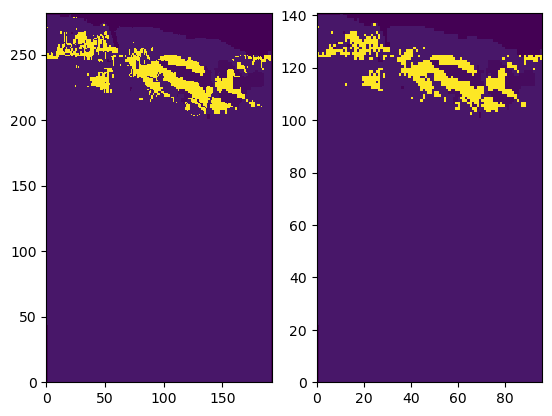

In [53]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(ncols=2)
ax[0].pcolormesh(receptor_array)
ax[1].pcolormesh(z)